<a href="https://colab.research.google.com/github/Mv0sKff/MyDeepLearning/blob/main/week_1/CIFAR10-ShallowLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: CIFAR10 Challenge

**CIFAR10** (http://www.cs.toronto.edu/~kriz/cifar.html) is one of the most famous ML data sets.

## Data
* 32x32 color images
* in 10 classes
* 50k training images
* 10k test images



<img src="https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width=700>

In [68]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from skimage.feature import local_binary_pattern
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.transform import resize, downscale_local_mean
import scipy.misc
from sklearn.svm import LinearSVC
from PIL import Image

In [69]:
# helper functions
def to_grayscale(img):
    return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

def convert_all_to_grayscale(images):
  #result = np.zeros((images.shape[0], images.shape[1], images.shape[2]))
  result = []
  for index, image in enumerate(images):
    #result[index] = to_grayscale(image)
    #result[index] = skimg.extract_patches_2d(image, (2, 2))
    #result[index] =
    #print(image.shape)
    im = Image.fromarray(image)
    im = im.resize((16, 16), Image.Resampling.LANCZOS)
    #display(im)
    result.append(local_binary_pattern(to_grayscale(np.array(im)), P=8, R=1, method="uniform").flatten())

  return np.array(result)

In [70]:
# get data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [71]:
im = Image.fromarray(X_train[1])
im = im.resize((16, 16), Image.Resampling.LANCZOS)

display(im)

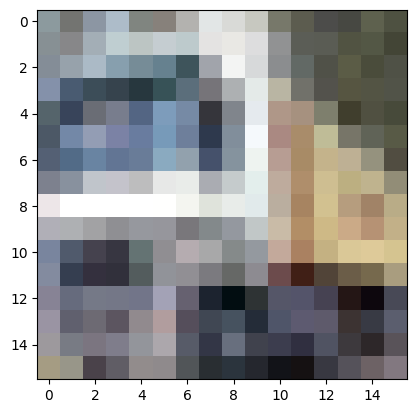

In [81]:
#asdf = np.array(im)
#plt.imshow(asdf)
#plt.show()

In [83]:
#plt.imshow(X_train[1])
#plt.show()

In [74]:
imo = to_grayscale(X_train[1])
imo.shape

(32, 32)

In [75]:
# convert all images to grayscale for less resource intensive pro
X_train = convert_all_to_grayscale(X_train)
X_test = convert_all_to_grayscale(X_test)
#X_train.shape

In [76]:
clf = LinearSVC()
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

In [77]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

Classification Accuracy: 0.20


In [78]:
# traindata: 50k 32X32 rgb images
X_train.shape

(50000, 256)

In [79]:
# labels
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Task: build the best classifier (with feature extration) using the methods you know from ML1+2
* work in small teams (2-4)
* use NumPy pre-processing, feature extraction and hyer-parameter tuning in Scikit-Learn
* no Neural Networks!
* best test F1-Score winns!